# Multiple Linear Regression - Bike Sharing Assignment

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# Solution

## Step 1 - Reading, Cleaning & Visualising the Data

### Step 1.1 - Reading the Data

In [305]:
#importing necessary libraries 

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [306]:
#reading the data

bsa_day_df = pd.read_csv('day.csv')
bsa_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [307]:
#checking shape of DF

bsa_day_df.shape

(730, 16)

In [308]:
#checking statistical data of DF

bsa_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 1.2 - Cleaning the data

In [309]:
#removing redundant & unwanted columns, we can remove 
## 1. instant - as it's only an index value
## 2. dteday - as we already have separete date, month and year columns
## 3. casual & registered - as 'cnt' is sum of these two columns and we need to do our analysis on total count instead of these categorical counts

bsa_day_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [310]:
#checking for Null Values

bsa_day_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

- no null values

In [311]:
# checking for missing values

bsa_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


- no missing values

In [312]:
# mapping values of categorical variables before visualising them 

bsa_day_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bsa_day_df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bsa_day_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bsa_day_df['mnth'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
bsa_day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [313]:
#checking for datatyoes

bsa_day_df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### Step 1.3 - Visualising the Data

- Checking if 'cnt' is linearly related to other variables or not 
- Checking multicollinearity

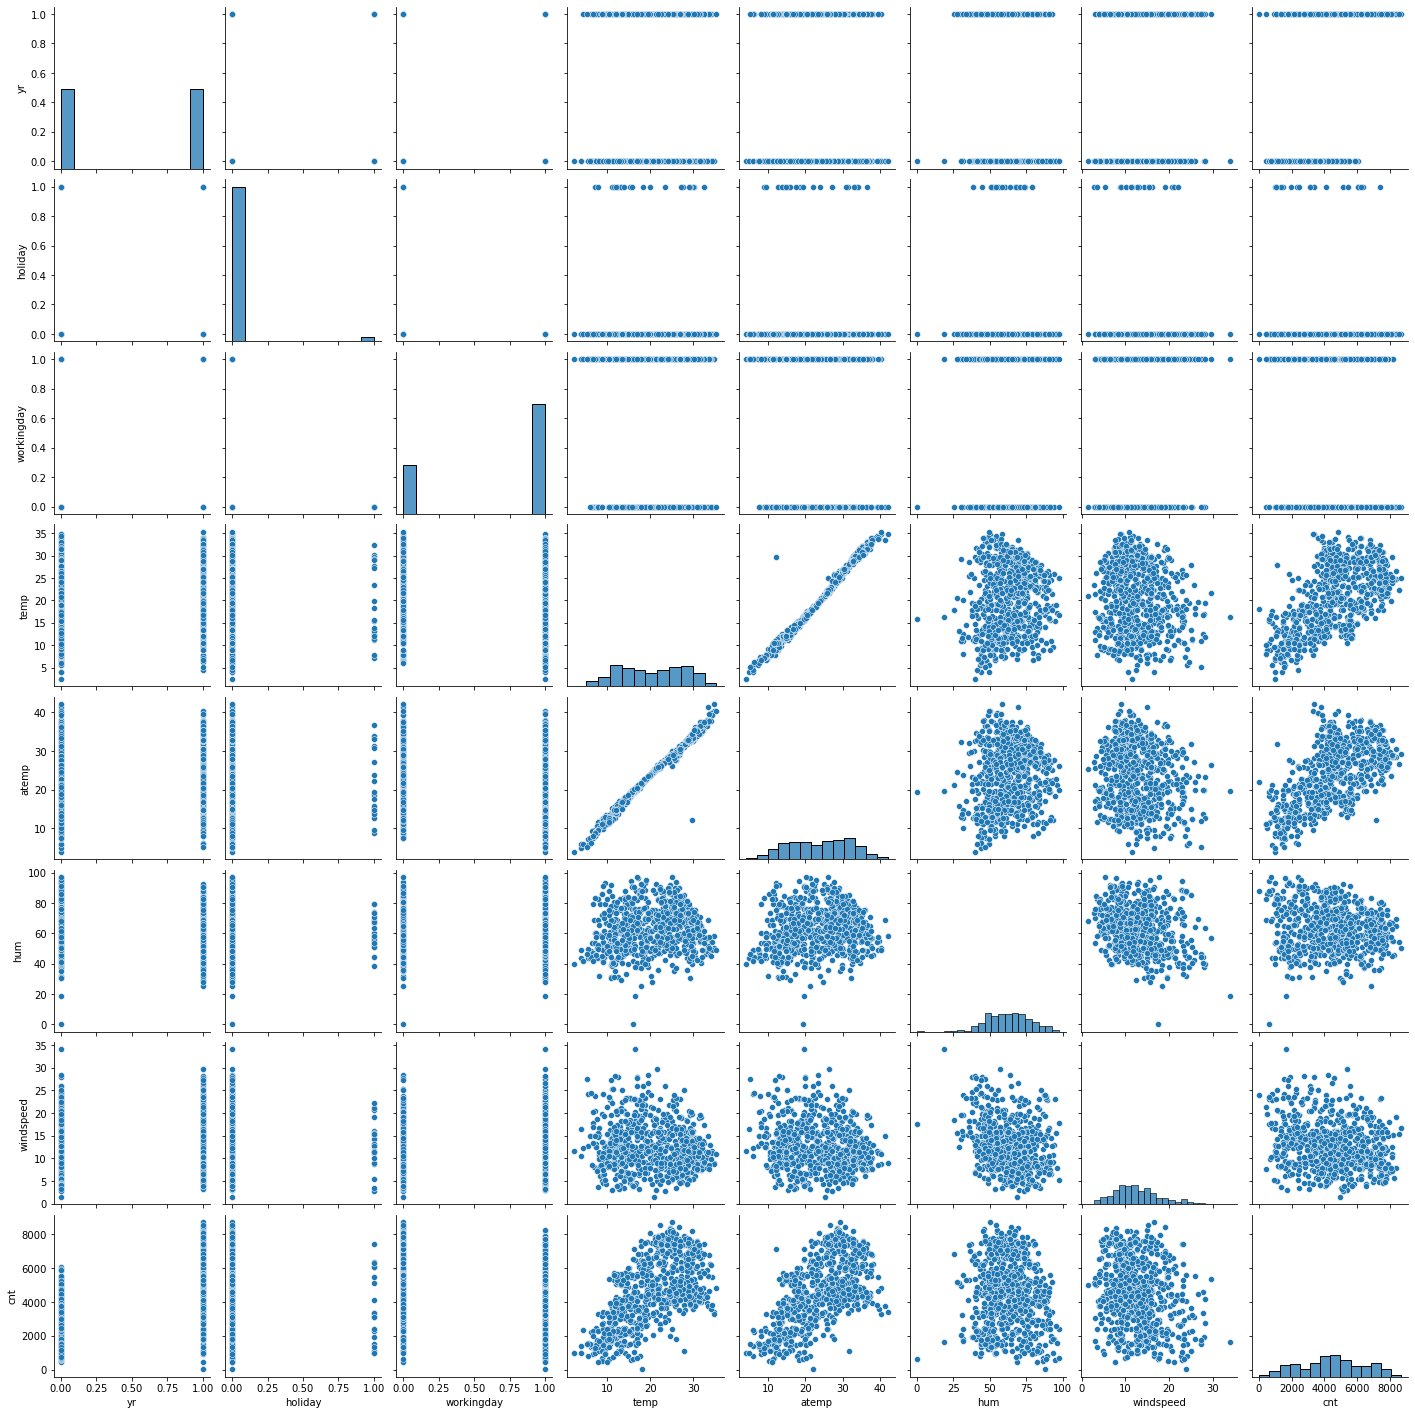

In [314]:
#visualising Numerical Variables

sns.pairplot(bsa_day_df)
plt.show()

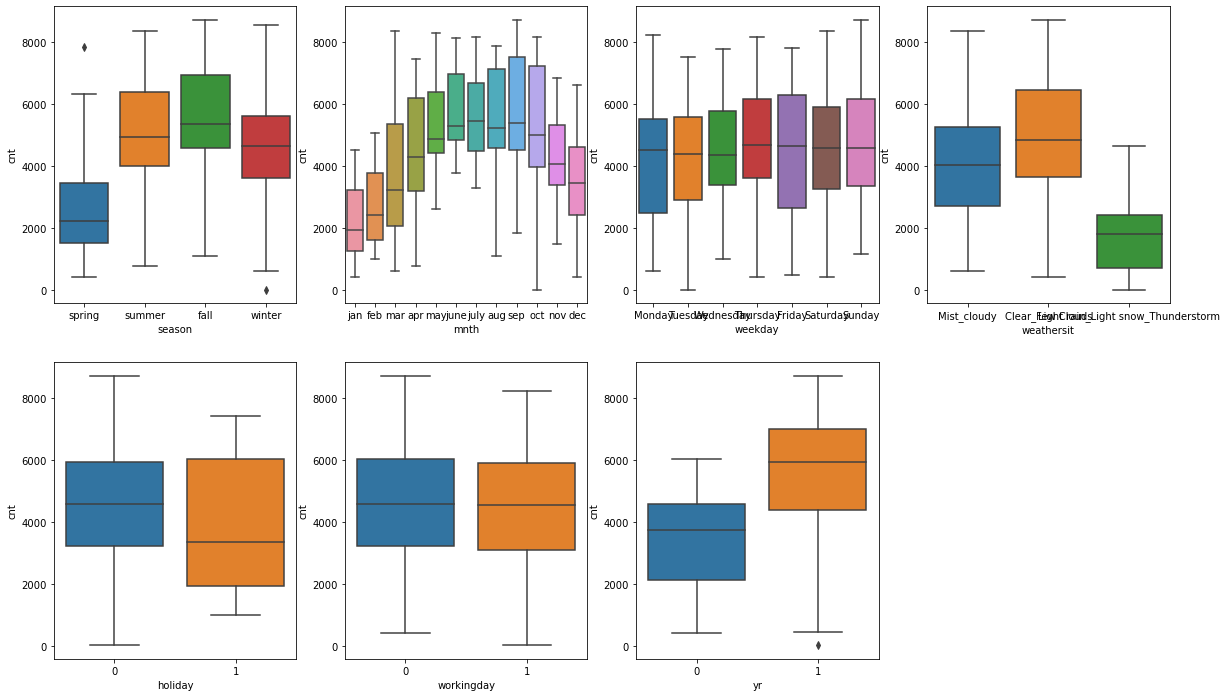

In [315]:
#visualising the Categorical Varibales

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bsa_day_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bsa_day_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bsa_day_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bsa_day_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bsa_day_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bsa_day_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bsa_day_df)
plt.show()

## Step 2 - Preparing Data for Modelling

### Step 2.1 - Creating dummy variables for all Categorical Variables

In [316]:
#extracting all categorical columns

catvar = bsa_day_df.select_dtypes(include = ['object'])
catvar

,season,mnth,weekday,weathersit
0,spring,jan,Monday,Mist_cloudy
1,spring,jan,Tuesday,Mist_cloudy
2,spring,jan,Wednesday,Clear_Few Clouds
3,spring,jan,Thursday,Clear_Few Clouds
4,spring,jan,Friday,Clear_Few Clouds
...,...,...,...,...
725,spring,dec,Friday,Mist_cloudy
726,spring,dec,Saturday,Mist_cloudy
727,spring,dec,Sunday,Mist_cloudy
728,spring,dec,Monday,Clear_Few Clouds


In [317]:
#create dummies for them using pd.get_dummies

cat_dummies = pd.get_dummies(catvar, drop_first = True)

In [318]:
#dropping all categorical columns for the original DF

bsa_day_df.drop(columns = list(catvar.columns), inplace = True)

In [319]:
# concatinating the dummies DF with the original DF to create the final data with dummies

bsa_day_df = pd.concat([bsa_day_df, cat_dummies], axis = 1)
bsa_day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


### Step 2.2 - Split the data into Train-Test

In [320]:
#dividing data into two DF - df_train & df_test

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bsa_day_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [321]:
#checking shapes of both DFs just to reconfirm!

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Step 2.3 - Scaling Variables

In [322]:
##detecting numerical columns

num_var = list(bsa_day_df.select_dtypes(include = ['int64', 'float64']).columns)
num_var

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [323]:
#importing and initiating

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#scaling those selected numerical columns

df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,0.984435,-0.161731,0.636364,-0.121335,-0.055878,-0.514725,-0.117752,1.562685,0,0,...,1,0,0,0,0,0,0,1,0,0
576,0.984435,-0.161731,0.636364,1.231731,1.194106,0.516433,-0.330615,1.399629,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0.984435,-0.161731,-1.571429,-0.420478,-0.348834,-0.069854,-0.385694,-0.215554,1,0,...,0,0,0,0,1,0,0,0,0,1
728,0.984435,-0.161731,0.636364,-1.294913,-1.473492,-1.045032,2.018143,-1.379511,1,0,...,0,0,1,0,0,0,0,0,0,0
482,0.984435,-0.161731,-1.571429,-0.627580,-0.571474,-1.000840,-0.779889,-0.136589,0,1,...,0,0,0,0,1,0,0,0,0,1


## Step 3 - Training the Model

### Step 3.1 - Split the data into X and y

In [324]:
#creating y_train & X_train

y_train = df_train.pop('cnt')
X_train = df_train

### Step 3.2 - Selecting variables using RFE metod

In [325]:
#importing RFE & Linear Regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [326]:
#running RFE with the output number of the variable equal to 13

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 13)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=13)

In [327]:
#listing all the variables with rfe.ranking_

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 13),
 ('hum', False, 7),
 ('windspeed', False, 5),
 ('season_spring', True, 1),
 ('season_summer', False, 4),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 16),
 ('mnth_mar', False, 17),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 2),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light rain_Light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [328]:
#storing columns selected by RFE in col

col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'season_spring', 'season_winter', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_Sunday',
       'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [329]:
#creating df having rfe supported variables

X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,temp,season_spring,season_winter,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_nov,mnth_sep,weekday_Sunday,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
653,0.984435,-0.121335,0,1,0,0,0,0,0,0,0,0,0
576,0.984435,1.231731,0,0,0,0,0,1,0,0,0,0,0
426,0.984435,-0.420478,1,0,0,0,0,0,0,0,1,0,1
728,0.984435,-1.294913,1,0,1,0,0,0,0,0,0,0,0
482,0.984435,-0.627580,0,0,0,0,0,0,0,0,1,0,1


### Step 3.3 - Building model using Statsmodel, for the detailed Statistics

#### Model 1 based on RFE Selected Columns

In [330]:
#adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

#running the linear model
lm1 = sm.OLS(y_train, X_train_rfe).fit()

#printing summary of model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     178.8
Date:                Tue, 03 May 2022   Prob (F-statistic):          1.20e-177
Time:                        15:54:40   Log-Likelihood:                -280.44
No. Observations:                 510   AIC:                             588.9
Df Residuals:                     496   BIC:                             648.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [331]:
#dropping 'const'

X_train_rfe.drop(columns = 'const').values

array([[ 0.98443485, -0.1213349 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.98443485,  1.23173122,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.98443485, -0.42047849,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.01581126, -1.48320423,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.01581126, -1.28110586,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.01581126, -0.3306349 ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [332]:
#dropping 'weekday_Sunday' as it's having high p-value

X_train_rfe.drop(columns = 'weekday_Sunday', inplace = True)

#### Model 2 after dropping 'weekday_Sunday'

In [333]:
#adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

#running the linear model
lm2 = sm.OLS(y_train, X_train_rfe).fit()

#printing summary of model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.9
Date:                Tue, 03 May 2022   Prob (F-statistic):          3.10e-178
Time:                        15:54:44   Log-Likelihood:                -281.78
No. Observations:                 510   AIC:                             589.6
Df Residuals:                     497   BIC:                             644.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [334]:
#dropping 'mnth_feb' as it's having high p-value

X_train_rfe.drop(columns = 'mnth_feb', inplace = True)

#### Model 3 after dropping 'mnth_feb'

In [335]:
#adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

#running the linear model
lm3 = sm.OLS(y_train, X_train_rfe).fit()

#printing summary of model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.1
Date:                Tue, 03 May 2022   Prob (F-statistic):          1.11e-178
Time:                        15:54:47   Log-Likelihood:                -283.51
No. Observations:                 510   AIC:                             591.0
Df Residuals:                     498   BIC:                             641.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [336]:
#dropping 'mnth_jan' as it's having high p-value

X_train_rfe.drop(columns = 'mnth_jan', inplace = True)

#### Model 4 after dropping 'mnth_jan'

In [337]:
#adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

#running the linear model
lm4 = sm.OLS(y_train, X_train_rfe).fit()

#printing summary of model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.1
Date:                Tue, 03 May 2022   Prob (F-statistic):          6.04e-179
Time:                        15:54:49   Log-Likelihood:                -285.70
No. Observations:                 510   AIC:                             593.4
Df Residuals:                     499   BIC:                             640.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [338]:
#dropping 'mnth_dec' as it's having high p-value

X_train_rfe.drop(columns = 'mnth_dec', inplace = True)

#### Model 5 after dropping 'mnth_dec'

In [339]:
#adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

#running the linear model
lm5 = sm.OLS(y_train, X_train_rfe).fit()

#printing summary of model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.8
Date:                Tue, 03 May 2022   Prob (F-statistic):          1.98e-179
Time:                        15:54:51   Log-Likelihood:                -287.42
No. Observations:                 510   AIC:                             594.8
Df Residuals:                     500   BIC:                             637.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

- Now that all the p-values are looking good and also r-square & adjusted r-square are almost similar we can proceed with this model 'lm5' after checking whether it's VIF valeus are also under normal range.

In [340]:
#calculating VIF of lm5

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns[1:]
vif['VIF'] = [variance_inflation_factor(X_train_rfe.drop(columns = 'const').values, i ) for i in range(len(X_train_rfe.columns[1:]))]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
1,temp,2.21
3,season_winter,1.84
2,season_spring,1.80
5,mnth_nov,1.56
4,mnth_july,1.34
8,weathersit_Mist_cloudy,1.31
6,mnth_sep,1.16
7,weathersit_Light rain_Light snow_Thunderstorm,1.06
0,yr,1.02


- VIF of all the selected variables is looking good (under 5). so we can go ahead with this 'lm5' model. 

### Step 3.4 - Residual Analysis of the Train Data

- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [341]:
y_train_cnt = lm5.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

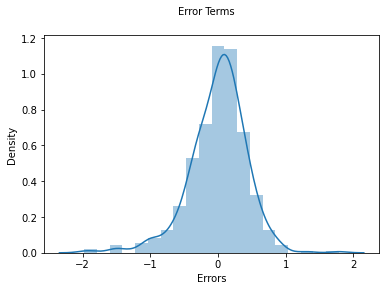

In [342]:
#plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 10)
plt.xlabel('Errors', fontsize = 10)

## Step 4 - Preparing Test Data & then Making Predictions

### Step 4.1 - Scaling variables of Test DF  

In [343]:
##detecting numerical columns

num_var = list(df_test.select_dtypes(include = ['int64', 'float64']).columns)
num_var

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [344]:
#performing scaling operation
df_test[num_var] = scaler.transform(df_test[num_var])

### Step 4.2 - Split the data into X and y

In [345]:
#dividing data into X_test & y_test

y_test = df_test.pop('cnt')
X_test = df_test

### Step 4.3 - Dropping columns from X_test & adding Constant to X_test_rfe 

In [346]:
#creating X_test_rfe by dropping those columns from X_test which are not there in X_train_rfe

X_train_rfe.columns[1:]
retain = list(X_train_rfe.columns[1:])
X_test_rfe = X_test[retain]
X_test_rfe.head()

,yr,temp,season_spring,season_winter,mnth_july,mnth_nov,mnth_sep,weathersit_Light rain_Light snow_Thunderstorm,weathersit_Mist_cloudy
184,-1.015811,1.305371,0,0,1,0,0,0,1
535,0.984435,1.613721,0,0,0,0,0,0,0
299,-1.015811,-0.112129,0,1,0,0,0,0,1
221,-1.015811,1.526280,0,0,0,0,0,0,0
152,-1.015811,1.240938,0,0,0,0,0,0,0


In [347]:
#adding a constant variable in X_test_rfe

X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.columns

Index(['const', 'yr', 'temp', 'season_spring', 'season_winter', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_Light rain_Light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

### Step 4.4 - Making Prediction  

In [348]:
y_pred = lm5.predict(X_test_rfe)

## Step 5 - Model Evaluation

In [349]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8128556931156046

 - RSquare value for predictions on test data (0.812) is almost same as RSquare value of train data(0.819). This is a good R-squared value, hence we can say that our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_pred')

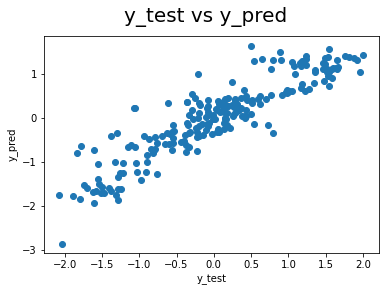

In [355]:
#plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)

Text(0.5, 0, 'Errors')

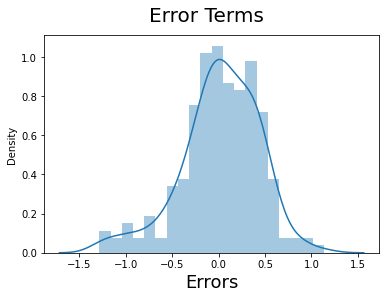

In [353]:
#plotting the histogram of the error terms

error = y_test-y_pred

fig = plt.figure()
sns.distplot(error, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [354]:
lm5


- We can see that the equation of our best fitted line is:

    cnt = 0.52 * yr + 0.46 * temp - 0.52 * season_spring + 0.29 * season_winter - 0.29 * mnth_july - 0.18 * mnth_nov + 0.27 * mnth_sep - 1.33 * weathersit_Light rain_Light snow_Thunderstorm - 0.35 * weathersit_Mist_cloudy